In [72]:
# %pip install plotly

In [73]:
# %pip install --upgrade nbformat

In [74]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px

from tqdm import tqdm


In [75]:
# opening STAC catalog

catalog = pystac_client.Client.open(
    "https://storage.googleapis.com/dgds-data-public/gca/SOTC/gca-stac_sotc/catalog.json" # cloud API
    # r"p:\1000545-054-globalbeaches\15_GlobalCoastalAtlas\coclicodata\current\catalog.json" # P drive API 
)
catalog

<Client id=gca-catalog>

In [76]:
list(catalog.get_collections())

[<CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=world_pop>,
 <CollectionClient id=world_gdp>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_drivers>,
 <CollectionClient id=esl_gwl>,
 <CollectionClient id=sub_threat>,
 <CollectionClient id=Exp_world_pop>,
 <CollectionClient id=Haz-ESL>,
 <CollectionClient id=Vul-Inf_Mort>,
 <CollectionClient id=Haz-GCM_90-100>,
 <CollectionClient id=Exp-NS_Slopes>,
 <CollectionClient id=Vul_MYS>,
 <CollectionClient id=Vul_RS>,
 <CollectionClient id=Haz-GCM_40-50>,
 <CollectionClient id=Haz-ERA5_04-14>,
 <CollectionClient id=Vul-GDP_Cap>,
 <CollectionClient id=Haz-GCM_04-14>,
 <CollectionClient id=Haz-Land_Sub_2010_COGs>,
 <CollectionClient id=Haz-Land_Sub_2040_COGs>,
 <CollectionClient id=Vul-Roads_Density_COGs>]

In [77]:
collection=catalog.get_child("Haz-ERA5_04-14")
collection

<CollectionClient id=Haz-ERA5_04-14>

In [78]:
href = collection.assets["data"].href
ds = xr.open_zarr(href)
ds

<xarray.Dataset>
Dimensions:    (latitude: 361, longitude: 720, time: 96432)
Coordinates:
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time       (time) datetime64[ns] 2004-01-01 ... 2014-12-31T23:00:00
Data variables:
    swh        (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
Attributes: (12/22)
    AUTHOR:              European Copernicus Marine Service
    CITATION:            European Copernicus Marine Service. (Year). Reanalys...
    COMMENT:             The dataset represents the significant height of com...
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         Significant Height of Combined Wind Waves and Swell ...
    ...                  ...
    TAGS:                ['significant height', 'wind waves', 'swell', 'ocean...
    TEMPORAL_EXTENT:     ['2004-01-01T00:00:00Z', '2014-12-31T23:59:59Z']
    TITLE:               Significant Height of Combined Wind Waves and Swell
    TITLE_ABBREVIATION:  SWH
    UNITS:               meters
    history:             2024-02-13 08:37:09 GMT by grib_to_netcdf-2.25.1: /o...

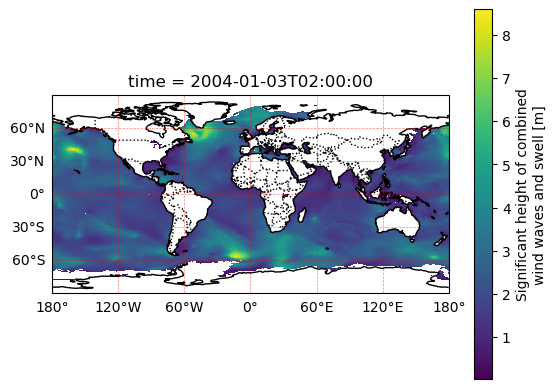

In [82]:


# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
ds.isel(time=50)["swh"].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
# ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

In [83]:
#Change longitude coordinate
def longitude_coverter(lon):
    if lon <0:
        lon=lon+360
    else:
        lon=lon
    return lon

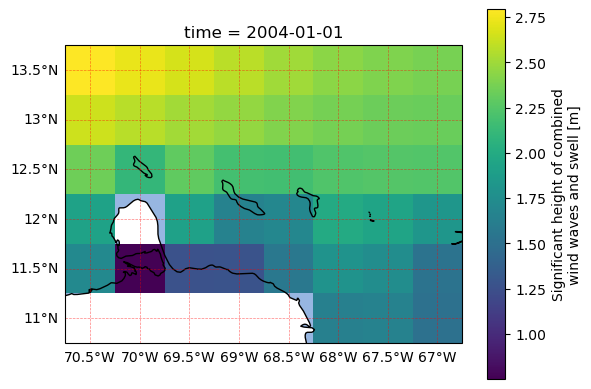

In [84]:

lon_min=-66.985558489
lon_max=-70.897144235

var="swh"
time_step=0
lat_min=10.641308809
lat_max=13.734711864


# #Change longitude coordinate
# def longitude_coverter(lon_min, lon_max)
#     lon_span=[lon_min,lon_max]

#     for i,lon in enumerate(lon_span):
#         if lon <0:
#             lon_span[i]=lon+360
#         else:
#             lon_span[i]=lon
#     return lon_span

# #Change longitude coordinate
# def longitude_coverter(lon):
#         if lon <0:
#             lon=lon+360
#         else:
#             lon=lon
#         return lon

lon_span=[longitude_coverter(lon_min),longitude_coverter(lon_max)]





# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
ds.isel(time=time_step).sel(longitude=slice(np.min(lon_span),np.max(lon_span)),latitude=slice(lat_max,lat_min))[var].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

create a scatterplot

In [87]:
#Import the dataframe with points of interest

df2=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Arjen_Vector_Template_Netherland_Antilles.csv")
df2.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136


In [88]:
longitude_coverter(df2["Intersect_lon"].iloc[0])

291.5989672035

In [89]:
#Filter each each ds for each df
ds_filtered=ds.sel(latitude=df2["Intersect_lat"].iloc[0],longitude=longitude_coverter(df2["Intersect_lon"].iloc[0]),method="nearest")
ds_filtered


<xarray.Dataset>
Dimensions:    (time: 96432)
Coordinates:
    latitude   float32 12.5
    longitude  float32 291.5
  * time       (time) datetime64[ns] 2004-01-01 ... 2014-12-31T23:00:00
Data variables:
    swh        (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/22)
    AUTHOR:              European Copernicus Marine Service
    CITATION:            European Copernicus Marine Service. (Year). Reanalys...
    COMMENT:             The dataset represents the significant height of com...
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         Significant Height of Combined Wind Waves and Swell ...
    ...                  ...
    TAGS:                ['significant height', 'wind waves', 'swell', 'ocean...
    TEMPORAL_EXTENT:     ['2004-01-01T00:00:00Z', '2014-12-31T23:59:59Z']
    TITLE:               Significant Height of Combined Wind Waves and Swell
    TITLE_ABBREVIATION:  SWH
    UNITS:               meters
    history:             2024-02-13 08:37:09 GMT by grib_to_netcdf-2.25.1: /o...

In [90]:

f=ds_filtered.isel(time=0)[var].values
f


array(2.173263, dtype=float32)

In [91]:
# Rechunk the dataset to ensure the 'time' dimension is in a single chunk
ds_filtered_unchunked = ds_filtered.chunk(dict(time=-1))
ds_filtered_unchunked 


<xarray.Dataset>
Dimensions:    (time: 96432)
Coordinates:
    latitude   float32 12.5
    longitude  float32 291.5
  * time       (time) datetime64[ns] 2004-01-01 ... 2014-12-31T23:00:00
Data variables:
    swh        (time) float32 dask.array<chunksize=(96432,), meta=np.ndarray>
Attributes: (12/22)
    AUTHOR:              European Copernicus Marine Service
    CITATION:            European Copernicus Marine Service. (Year). Reanalys...
    COMMENT:             The dataset represents the significant height of com...
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         Significant Height of Combined Wind Waves and Swell ...
    ...                  ...
    TAGS:                ['significant height', 'wind waves', 'swell', 'ocean...
    TEMPORAL_EXTENT:     ['2004-01-01T00:00:00Z', '2014-12-31T23:59:59Z']
    TITLE:               Significant Height of Combined Wind Waves and Swell
    TITLE_ABBREVIATION:  SWH
    UNITS:               meters
    history:             2024-02-13 08:37:09 GMT by grib_to_netcdf-2.25.1: /o...

In [92]:
q=ds_filtered_unchunked#.isel(time=slice(0,10))
q

<xarray.Dataset>
Dimensions:    (time: 96432)
Coordinates:
    latitude   float32 12.5
    longitude  float32 291.5
  * time       (time) datetime64[ns] 2004-01-01 ... 2014-12-31T23:00:00
Data variables:
    swh        (time) float32 dask.array<chunksize=(96432,), meta=np.ndarray>
Attributes: (12/22)
    AUTHOR:              European Copernicus Marine Service
    CITATION:            European Copernicus Marine Service. (Year). Reanalys...
    COMMENT:             The dataset represents the significant height of com...
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         Significant Height of Combined Wind Waves and Swell ...
    ...                  ...
    TAGS:                ['significant height', 'wind waves', 'swell', 'ocean...
    TEMPORAL_EXTENT:     ['2004-01-01T00:00:00Z', '2014-12-31T23:59:59Z']
    TITLE:               Significant Height of Combined Wind Waves and Swell
    TITLE_ABBREVIATION:  SWH
    UNITS:               meters
    history:             2024-02-13 08:37:09 GMT by grib_to_netcdf-2.25.1: /o...

In [93]:


# Now apply the quantile operation to the rechunked dataset
p = q.quantile(0.99, dim='time')
p

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    quantile  float64 0.99
Data variables:
    swh       float64 dask.array<chunksize=(), meta=np.ndarray>

In [94]:
# from dask.diagnostics import ProgressBar

# with ProgressBar():
#     x=p.compute()

In [95]:
# x

In [96]:
df2["Lat_ERA5"]=0
df2["Lon_ERA5"]=0
df2["Lat_ERA5"]=df2["Lat_ERA5"].astype('float32')
df2["Lon_ERA5"]=df2["Lon_ERA5"].astype('float32')
df2

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,0.0,0.0
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,0.0,0.0
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,0.0,0.0
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,0.0,0.0
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,0.0,0.0
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,0.0,0.0
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,0.0,0.0
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,0.0,0.0


In [97]:
#Filter each each ds for all points
import warnings

ds_list=[]
for i in tqdm(df2.index,desc="appending ds_list"):
    ds_filtered=ds.sel(latitude=df2["Intersect_lat"].iloc[i],longitude=longitude_coverter(df2["Intersect_lon"].iloc[i]),method="nearest")
    df2["Lon_ERA5"].iloc[i]= ds_filtered["longitude"]
    df2["Lat_ERA5"].iloc[i]= ds_filtered["latitude"]

# Ignore all warnings
warnings.filterwarnings("ignore")
df2

appending ds_list:   0%|          | 0/623 [00:00<?, ?it/s]C:\Users\rowe\AppData\Local\Temp\ipykernel_5324\21376807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Lon_ERA5"].iloc[i]= ds_filtered["longitude"]
C:\Users\rowe\AppData\Local\Temp\ipykernel_5324\21376807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Lat_ERA5"].iloc[i]= ds_filtered["latitude"]
appending ds_list:   0%|          | 1/623 [00:00<02:08,  4.83it/s]

C:\Users\rowe\AppData\Local\Temp\ipykernel_5324\21376807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Lon_ERA5"].iloc[i]= ds_filtered["longitude"]
C:\Users\rowe\AppData\Local\Temp\ipykernel_5324\21376807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Lat_ERA5"].iloc[i]= ds_filtered["latitude"]
appending ds_list:   0%|          | 2/623 [00:00<02:43,  3.79it/s]C:\Users\rowe\AppData\Local\Temp\ipykernel_5324\21376807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5
...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5


In [98]:
df=df2
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5
...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5


In [99]:
df["Lat_Lon"]=list(zip(df2["Lat_ERA5"],df2["Lon_ERA5"]))
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)"
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)"
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)"
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)"
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)"
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)"
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)"
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)"


In [38]:
#Find the unique values to prevent recalculations

unique_points=df["Lat_Lon"].unique()
unique_points

array([(12.5, 291.5), (12.0, 291.0), (12.5, 291.0), (12.0, 292.0),
       (12.5, 290.0), (12.0, 291.5)], dtype=object)

In [43]:
x=12.5
y=291.5
ds_unchunk = ds[var].sel(latitude=x,longitude=y).chunk(dict(time=-1))
quan=ds_unchunk.quantile(0.95, dim='time')
quan

<xarray.DataArray 'swh' ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    quantile  float64 0.95

In [47]:
perc_95=[]
for x,y in tqdm(unique_points,desc="calculating percentile"):
    ds_unchunk = ds[var].sel(latitude=x,longitude=y).chunk(dict(time=-1))
    quan=ds_unchunk.quantile(0.95, dim='time')
    perc_95.append(quan)
perc_95

calculating percentile:   0%|          | 0/6 [00:00<?, ?it/s]

calculating percentile: 100%|██████████| 6/6 [00:12<00:00,  2.03s/it]


[<xarray.DataArray 'swh' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'swh' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'swh' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'swh' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'swh' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'swh' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95]

In [54]:
from dask.diagnostics import ProgressBar
unique_hs=[]
for i,hs in tqdm(enumerate(perc_95)):
    with ProgressBar():
        unique_hs.append(hs.compute())

unique_hs

0it [00:00, ?it/s]

[########################################] | 100% Completed | 13m 17s


1it [13:38, 818.04s/it]

[########################################] | 100% Completed | 11m 22s


2it [25:19, 749.26s/it]

[########################################] | 100% Completed | 381.31 s


3it [32:02, 591.14s/it]

[########################################] | 100% Completed | 377.02 s


4it [38:38, 514.24s/it]

[########################################] | 100% Completed | 353.80 s


5it [44:53, 464.02s/it]

[########################################] | 100% Completed | 348.41 s


6it [51:01, 510.26s/it]


[<xarray.DataArray 'swh' ()>
 array(1.95731354)
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'swh' ()>
 array(1.69595933)
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'swh' ()>
 array(1.97993088)
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'swh' ()>
 array(1.89008141)
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'swh' ()>
 array(1.90402317)
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'swh' ()>
 array(1.70201683)
 Coordinates:
     quantile  float64 0.95]

In [66]:
unique_hs_values=array_values = [da.values for da in unique_hs]
unique_hs_values

[array(1.95731354),
 array(1.69595933),
 array(1.97993088),
 array(1.89008141),
 array(1.90402317),
 array(1.70201683)]

In [67]:
unique_df = pd.DataFrame({
  'unique_points': unique_points,
  'unique_hs': unique_hs_values
})
unique_df


,unique_points,unique_hs
0,"(12.5, 291.5)",1.9573135375976562
1,"(12.0, 291.0)",1.6959593296051017
2,"(12.5, 291.0)",1.9799308776855469
3,"(12.0, 292.0)",1.8900814056396484
4,"(12.5, 290.0)",1.9040231704711914
5,"(12.0, 291.5)",1.702016830444336


In [68]:

unique_df.to_csv(r'P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\unique_netherland_antilles.csv', index=False)

In [100]:
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)"
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)"
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)"
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)"
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)"
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)"
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)"
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)"


In [101]:
# Merge df_template with unique_df on the "unique_points" column
merged_df = pd.merge(df, unique_df, left_on="Lat_Lon", right_on="unique_points", how="left")
merged_df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon,unique_points,unique_hs
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.9573135375976562
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.9573135375976562
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.9573135375976562
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.9573135375976562
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.9573135375976562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702016830444336
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702016830444336
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702016830444336
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702016830444336


In [103]:


merged_df.to_csv(r'P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\merged_netherland_antilles.csv', index=False)

In [105]:
df_master=pd.read_csv(r'P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\merged_netherland_antilles.csv')
df_master.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon,unique_points,unique_hs
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.957314
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.957314
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.957314
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.957314
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.957314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702017
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702017
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702017
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702017


In [147]:


# Create the initial scatter mapbox plot
fig2 = px.scatter_mapbox(df_master,
                         lat='Lat_ERA5',  
                         lon='Lon_ERA5',  
                         hover_name='Lat_Lon',  
                         color='unique_hs',
                        #  marker=dict(size=1),
                         zoom=8,  
                         center={'lat':  12.15, 'lon': -69},  
                         width=1000,  
                         height=550,
                         title="Era5 wave heights and corresponding transects")


fig3 = px.scatter_mapbox(df_master,
                         lat='Intersect_lat',  
                         lon='Intersect_lon',  
                         hover_name='transect_id',  
                         color='unique_hs')

fig2.add_trace(fig3.data[0]) 

# fig2.update_traces(name='Shoreline Transects', selector=dict(type='scattermapbox'))
# Update the layout
fig2.update_layout(title="Era5 wave heights and corresponding transects",mapbox_style="carto-positron", margin=dict(l=0,r=0,b=0,t=0), showlegend=True)


# Display the plot
fig2.show()
